In [4]:
from lightglue import LightGlue, SuperPoint, DISK, SIFT, ALIKED, DoGHardNet
from lightglue.utils import load_image, rbd
from lightglue import viz2d

# SuperPoint+LightGlue
extractor = SuperPoint(max_num_keypoints=2048).eval()  # load the extractor
matcher = LightGlue(features='superpoint').eval()  # load the matcher

# or DISK+LightGlue, ALIKED+LightGlue or SIFT+LightGlue
# extractor = DISK(max_num_keypoints=2048).eval()  # load the extractor
# matcher = LightGlue(features='disk').eval()  # load the matcher

INFO:matplotlib.font_manager:generated new fontManager


In [2]:
# load each image as a torch.Tensor on GPU with shape (3,H,W), normalized in [0,1]
image0 = load_image('/ws/datasets/HPatches/v_churchill/1.ppm')
image1 = load_image('/ws/datasets/HPatches/v_churchill/2.ppm')

In [ ]:
# extract local features
feats0 = extractor.extract(image0)  # auto-resize the image, disable with resize=None
feats1 = extractor.extract(image1)

# match the features
matches01 = matcher({'image0': feats0, 'image1': feats1})
feats0, feats1, matches01 = [rbd(x) for x in [feats0, feats1, matches01]]  # remove batch dimension
matches = matches01['matches']  # indices with shape (K,2)
kpts0 = feats0['keypoints']
kpts1 = feats1['keypoints']
points0 = kpts0[matches[..., 0]]  # coordinates in image #0, shape (K,2)
points1 = kpts1[matches[..., 1]]  # coordinates in image #1, shape (K,2)


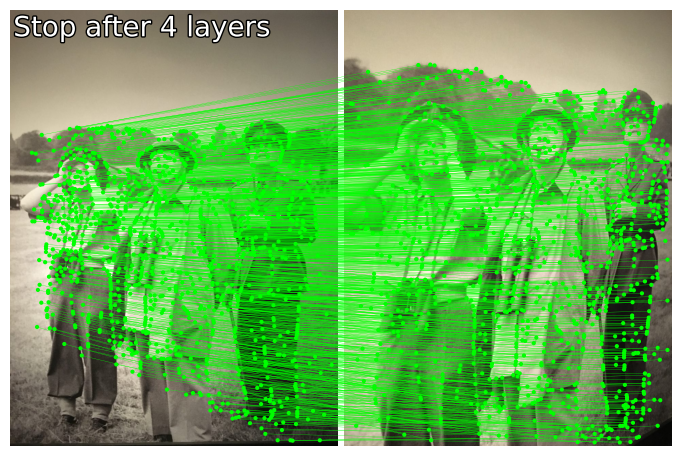

In [5]:
axes = viz2d.plot_images([image0, image1])
viz2d.plot_matches(points0, points1, color="lime", lw=0.2)
viz2d.add_text(0, f'Stop after {matches01["stop"]} layers', fs=20)

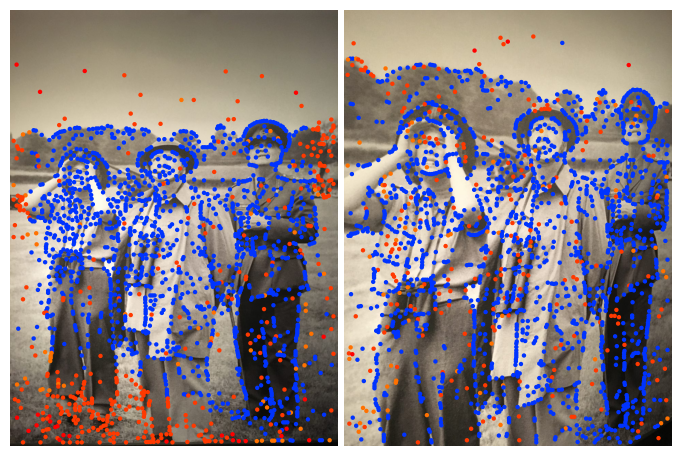

In [8]:
kpc0, kpc1 = viz2d.cm_prune(matches01["prune0"]), viz2d.cm_prune(matches01["prune1"])
viz2d.plot_images([image0, image1])
viz2d.plot_keypoints([kpts0, kpts1], colors=[kpc0, kpc1], ps=10)